In [1]:
import pandas as pd

In [2]:
# Reading order items data set

olist_order_items = pd.read_csv('../brazilian-ecommerce/olist_order_items_dataset.csv')
olist_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [3]:
# Reading order data set

olist_order_dataset = pd.read_csv('../brazilian-ecommerce/olist_orders_dataset.csv')
olist_order_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
# Merging order items with order 

order_all = pd.merge(olist_order_items, olist_order_dataset, on='order_id', how='inner')

# Get only non-null dates

filter_dates = order_all[(order_all['order_delivered_customer_date'].notnull() 
                          & order_all['order_delivered_carrier_date'].notnull() 
                          & order_all['order_purchase_timestamp'].notnull())]

# Subtract customer delivered date to delivered carrier date to know how long 
# it took for the purchase to arrive at the customer's home

order_all['difference_days_carrier_to_delivered'] = (
    pd.to_datetime(filter_dates['order_delivered_customer_date']) 
    - pd.to_datetime(filter_dates['order_delivered_carrier_date'])).dt.days


# Subtract customer delivered date to estimated delivery date date 
# to know if the purchase arrived late or in advanced.

order_all['difference_days_estimated_to_delivered'] = (
    pd.to_datetime(filter_dates['order_delivered_customer_date']) 
    - pd.to_datetime(filter_dates['order_estimated_delivery_date'])).dt.days


order_all = order_all.drop(['seller_id', 
                            'shipping_limit_date', 
                            'order_approved_at', 
                            'order_delivered_carrier_date', 
                            'order_delivered_customer_date', 
                            'order_estimated_delivery_date'], axis=1)

order_all[(order_all['difference_days_carrier_to_delivered'].isnull())].head()

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,difference_days_carrier_to_delivered,difference_days_estimated_to_delivered
79,002f19a65a2ddd70a090297872e6d64e,1,9eae06d51aaa383b2bed5547a19d581c,53.98,23.31,7fa80efb1ef15ca4104627910c29791c,shipped,2018-03-21 13:05:30,NaN,NaN
84,00310b0c75bb13015ec4d82d341865a4,1,c8e7c2ef329fcda4a233e7e2f8bb8b7d,39.90,15.38,0dad07848c618cc5a4679a1bfe1db8d2,canceled,2018-08-15 14:29:08,NaN,NaN
260,00a99c50fdff7e36262caba33821875a,1,76d75f398634bf194ba99d7297e7d1fa,52.99,22.30,7a399396442d5601cbedfbd0a3cf1da4,shipped,2018-08-17 16:25:04,NaN,NaN
270,00ae7a8b4936674ebb701d4a23719a79,1,66f09a6de4f2ef63aaf5349b60a0e0c0,27.90,9.26,a7e8a3cb55d9c9a536992c6465a46a3f,canceled,2018-05-09 14:14:06,NaN,NaN
422,00ff0cf5583758e6964723e42f111bf4,1,bb1fe952bdc16ef8974d4ca11aec19b7,154.90,15.25,e3626ed5d1f2e3a02d692ec948b25eeb,canceled,2017-04-10 00:45:56,NaN,NaN


In [5]:
order_all['time_to_carrier'] = 'carrier-NA'
order_all.loc[
    (order_all['difference_days_carrier_to_delivered'] >= 5) 
    & order_all['difference_days_carrier_to_delivered'].notnull(), 'time_to_carrier'] = 'carrier-late'

order_all.loc[
    (order_all['difference_days_carrier_to_delivered'] < 5) 
    & order_all['difference_days_carrier_to_delivered'].notnull(), 'time_to_carrier'] = 'carrier-normal'


order_all['time_to_delivered'] = 'delivered-NA'
order_all.loc[
    (order_all['difference_days_estimated_to_delivered'] >= 1) 
    & order_all['difference_days_estimated_to_delivered'].notnull(), 'time_to_delivered'] = 'delivered-late'

order_all.loc[
    (order_all['difference_days_estimated_to_delivered'] == 0) 
    & order_all['difference_days_estimated_to_delivered'].notnull(), 'time_to_delivered'] = 'delivered-normal'

order_all.loc[
    (order_all['difference_days_estimated_to_delivered'] < 0) 
    & order_all['difference_days_estimated_to_delivered'].notnull(), 'time_to_delivered'] = 'delivered-advanced'

order_all.head()

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,difference_days_carrier_to_delivered,difference_days_estimated_to_delivered,time_to_carrier,time_to_delivered
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,1.0,-9.0,carrier-normal,delivered-advanced
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,8.0,-3.0,carrier-late,delivered-advanced
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,6.0,-14.0,carrier-late,delivered-advanced
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,4.0,-6.0,carrier-normal,delivered-advanced
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,13.0,-16.0,carrier-late,delivered-advanced


In [147]:
order_all[["order_id", "order_status"]].groupby(['order_status'], as_index=False).count()

,order_status,order_id
0,approved,3
1,canceled,542
2,delivered,110197
3,invoiced,359
4,processing,357
5,shipped,1185
6,unavailable,7


In [6]:
customer = pd.read_csv('../brazilian-ecommerce/olist_customers_dataset.csv')
customer = customer.drop(['customer_zip_code_prefix'], axis=1)
customer.head()

,customer_id,customer_unique_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP


In [7]:
customer_n_1 = pd.merge(order_all, customer, on='customer_id', how='inner')
customer_n_1.head()

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,difference_days_carrier_to_delivered,difference_days_estimated_to_delivered,time_to_carrier,time_to_delivered,customer_unique_id,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,1.0,-9.0,carrier-normal,delivered-advanced,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,8.0,-3.0,carrier-late,delivered-advanced,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,6.0,-14.0,carrier-late,delivered-advanced,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,4.0,-6.0,carrier-normal,delivered-advanced,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,13.0,-16.0,carrier-late,delivered-advanced,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP


In [8]:
customer_n_1['order_purchase_timestamp'] = pd.to_datetime(customer_n_1['order_purchase_timestamp'])

max_date = customer_n_1.groupby('customer_unique_id').order_purchase_timestamp.max().reset_index()

max_date['recency'] = (
    max_date['order_purchase_timestamp'].max() - max_date['order_purchase_timestamp']).dt.days

customer_n_2 = pd.merge(customer_n_1, 
                        max_date[['customer_unique_id', 'recency']], on='customer_unique_id', how='inner')

customer_n_2 = customer_n_2.drop(['order_purchase_timestamp'], axis=1)
customer_n_2.head()

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,difference_days_carrier_to_delivered,difference_days_estimated_to_delivered,time_to_carrier,time_to_delivered,customer_unique_id,customer_city,customer_state,recency
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,1.0,-9.0,carrier-normal,delivered-advanced,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,355
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,8.0,-3.0,carrier-late,delivered-advanced,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP,349
2,c105be01f21c9df6a2579f59b95cbcd9,1,d2f5484cbffe4ca766301b21ab9246dd,12.88,11.85,02288a47f696f3054b9ef1d5f8e73973,delivered,5.0,-9.0,carrier-late,delivered-advanced,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP,349
3,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,6.0,-14.0,carrier-late,delivered-advanced,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG,231
4,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,4.0,-6.0,carrier-normal,delivered-advanced,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP,25


In [11]:
customer_n_2[["customer_id", "customer_state"]].groupby(['customer_state'], as_index=False).count()

,customer_state,customer_id
0,AC,92
1,AL,444
2,AM,165
3,AP,82
4,BA,3799
5,CE,1478
6,DF,2406
7,ES,2256
8,GO,2333
9,MA,824


In [141]:
customer_n_2['customer_id'].nunique()

98666

In [9]:
produts = pd.read_csv('../brazilian-ecommerce/olist_products_dataset.csv')

produts = produts.drop(['product_name_lenght', 
                        'product_length_cm', 
                        'product_height_cm', 
                        'product_height_cm', 
                        'product_width_cm' ], axis=1)
produts.head()

,product_id,product_category_name,product_description_lenght,product_photos_qty,product_weight_g
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,287.0,1.0,225.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,276.0,1.0,1000.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,250.0,1.0,154.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,261.0,1.0,371.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,402.0,4.0,625.0


In [10]:
customer_n_3 = pd.merge(customer_n_2, produts, on='product_id', how='inner')
customer_n_3.head()

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,difference_days_carrier_to_delivered,difference_days_estimated_to_delivered,time_to_carrier,time_to_delivered,customer_unique_id,customer_city,customer_state,recency,product_category_name,product_description_lenght,product_photos_qty,product_weight_g
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,1.0,-9.0,carrier-normal,delivered-advanced,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,355,cool_stuff,598.0,4.0,650.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,55.9,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,8.0,-13.0,carrier-late,delivered-advanced,0fb8e3eab2d3e79d92bb3fffbb97f188,jatai,GO,431,cool_stuff,598.0,4.0,650.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,64.9,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,12.0,-3.0,carrier-late,delivered-advanced,3419052c8c6b45daf79c1e426f9e9bcb,belo horizonte,MG,107,cool_stuff,598.0,4.0,650.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,58.9,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,7.0,-16.0,carrier-late,delivered-advanced,e7c828d22c0682c1565252deefbe334d,sao jose dos pinhais,PR,397,cool_stuff,598.0,4.0,650.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,13.0,-8.0,carrier-late,delivered-advanced,0bb98ba72dcc08e95f9d8cc434e9a2cc,conselheiro lafaiete,MG,388,cool_stuff,598.0,4.0,650.0


In [11]:
# Adicionando o dataset de pagamento

payment = pd.read_csv('../brazilian-ecommerce/olist_order_payments_dataset.csv')

payment = payment.groupby("order_id").agg({"payment_sequential" : "count", 
                                           "payment_installments": "sum",
                                          "payment_value" : "sum"}).reset_index()
payment.head()

,order_id,payment_sequential,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,3,218.04


In [12]:
# Merge do datase de customer com o de pagamento

customer_n_4 = pd.merge(customer_n_3, payment, on='order_id', how='inner')
customer_n_4.head()

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,difference_days_carrier_to_delivered,difference_days_estimated_to_delivered,time_to_carrier,...,customer_city,customer_state,recency,product_category_name,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,1.0,-9.0,carrier-normal,...,campos dos goytacazes,RJ,355,cool_stuff,598.0,4.0,650.0,1,2,72.19
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,55.9,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,8.0,-13.0,carrier-late,...,jatai,GO,431,cool_stuff,598.0,4.0,650.0,1,1,73.86
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,64.9,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,12.0,-3.0,carrier-late,...,belo horizonte,MG,107,cool_stuff,598.0,4.0,650.0,1,2,83.23
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,58.9,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,7.0,-16.0,carrier-late,...,sao jose dos pinhais,PR,397,cool_stuff,598.0,4.0,650.0,1,3,75.07
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,13.0,-8.0,carrier-late,...,conselheiro lafaiete,MG,388,cool_stuff,598.0,4.0,650.0,1,4,72.19


In [13]:
reviews = pd.read_csv('../brazilian-ecommerce/olist_order_reviews_dataset.csv')

reviews = reviews.drop(['review_id', 
                        'review_comment_title', 
                        'review_creation_date', 
                        'review_answer_timestamp'], axis=1)

reviews = reviews[(reviews['review_comment_message'].isnull())]

reviews.head()

,order_id,review_score,review_comment_message
0,73fc7af87114b39712e6da79b0a377eb,4,NaN
1,a548910a1c6147796b98fdf73dbeba33,5,NaN
2,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN
5,b18dcdf73be66366873cd26c5724d1dc,1,NaN
6,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN


In [14]:
view_all = pd.merge(customer_n_4, reviews, on='order_id', how='inner')
view_all.head()

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,difference_days_carrier_to_delivered,difference_days_estimated_to_delivered,time_to_carrier,...,recency,product_category_name,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_installments,payment_value,review_score,review_comment_message
0,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,58.9,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,7.0,-16.0,carrier-late,...,397,cool_stuff,598.0,4.0,650.0,1,3,75.07,5,NaN
1,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,13.0,-8.0,carrier-late,...,388,cool_stuff,598.0,4.0,650.0,1,4,72.19,5,NaN
2,a0f9acf0b6294ed8561e32cde1a966bc,1,4244733e06e7ecb4970a6e2683c13e61,55.9,26.93,4851b3bca4a48b395dfad7aa57c3f72a,delivered,29.0,7.0,carrier-late,...,402,cool_stuff,598.0,4.0,650.0,1,1,82.83,5,NaN
3,c9ef97d2854afe64a3b4488bc2836af6,2,4244733e06e7ecb4970a6e2683c13e61,58.9,18.12,0a29abf475fb8039d2775913d6f0b6f0,delivered,4.0,-23.0,carrier-normal,...,393,cool_stuff,598.0,4.0,650.0,1,1,153.75,5,NaN
4,c9ef97d2854afe64a3b4488bc2836af6,1,436c8d57ff8d4aa254318e9bd9b48c83,58.9,17.83,0a29abf475fb8039d2775913d6f0b6f0,delivered,4.0,-23.0,carrier-normal,...,393,cool_stuff,599.0,6.0,530.0,1,1,153.75,5,NaN


In [15]:
type_customer = view_all[['customer_unique_id', 'order_id']] \
    .drop_duplicates().groupby(['customer_unique_id'], as_index=False).count()

type_customer['type_customer'] = 1
type_customer.loc[(type_customer['order_id'] > 1) & (type_customer['order_id'] <= 5), 'type_customer'] = 2
type_customer.loc[(type_customer['order_id'] > 5) & (type_customer['order_id'] <= 10), 'type_customer'] = 3
type_customer.loc[(type_customer['order_id'] > 10), 'type_customer'] = 4

type_customer = type_customer.drop(['order_id'], axis=1)
type_customer.head()

,customer_unique_id,type_customer
0,0000b849f77a49e4a4ce2b2a4ca5be3f,1
1,0000f46a3911fa3c0805444483337064,1
2,0004aac84e0df4da2b147fca70cf8255,1
3,0004bd2a26a76fe21f786e4fbd80607f,1
4,00050ab1314c0e55a6ca13cf7181fecf,1


In [16]:
new_view = pd.merge(view_all, type_customer, on='customer_unique_id', how='inner')
new_view.head()

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,difference_days_carrier_to_delivered,difference_days_estimated_to_delivered,time_to_carrier,...,product_category_name,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_installments,payment_value,review_score,review_comment_message,type_customer
0,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,58.9,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,7.0,-16.0,carrier-late,...,cool_stuff,598.0,4.0,650.0,1,3,75.07,5,NaN,1
1,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,13.0,-8.0,carrier-late,...,cool_stuff,598.0,4.0,650.0,1,4,72.19,5,NaN,1
2,a0f9acf0b6294ed8561e32cde1a966bc,1,4244733e06e7ecb4970a6e2683c13e61,55.9,26.93,4851b3bca4a48b395dfad7aa57c3f72a,delivered,29.0,7.0,carrier-late,...,cool_stuff,598.0,4.0,650.0,1,1,82.83,5,NaN,1
3,c9ef97d2854afe64a3b4488bc2836af6,2,4244733e06e7ecb4970a6e2683c13e61,58.9,18.12,0a29abf475fb8039d2775913d6f0b6f0,delivered,4.0,-23.0,carrier-normal,...,cool_stuff,598.0,4.0,650.0,1,1,153.75,5,NaN,1
4,c9ef97d2854afe64a3b4488bc2836af6,1,436c8d57ff8d4aa254318e9bd9b48c83,58.9,17.83,0a29abf475fb8039d2775913d6f0b6f0,delivered,4.0,-23.0,carrier-normal,...,cool_stuff,599.0,6.0,530.0,1,1,153.75,5,NaN,1


In [17]:
new_view = new_view.drop(['order_id', 
                          'order_item_id', 
                          'customer_id', 
                          'difference_days_carrier_to_delivered', 
                          'difference_days_estimated_to_delivered', 
                          'payment_sequential', 
                          'payment_value'], axis=1)

new_view.head()

,product_id,price,freight_value,order_status,time_to_carrier,time_to_delivered,customer_unique_id,customer_city,customer_state,recency,product_category_name,product_description_lenght,product_photos_qty,product_weight_g,payment_installments,review_score,review_comment_message,type_customer
0,4244733e06e7ecb4970a6e2683c13e61,58.9,16.17,delivered,carrier-late,delivered-advanced,e7c828d22c0682c1565252deefbe334d,sao jose dos pinhais,PR,397,cool_stuff,598.0,4.0,650.0,3,5,NaN,1
1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,delivered,carrier-late,delivered-advanced,0bb98ba72dcc08e95f9d8cc434e9a2cc,conselheiro lafaiete,MG,388,cool_stuff,598.0,4.0,650.0,4,5,NaN,1
2,4244733e06e7ecb4970a6e2683c13e61,55.9,26.93,delivered,carrier-late,delivered-late,33449409b16400dbeaf886a5140bf59c,dom macedo costa,BA,402,cool_stuff,598.0,4.0,650.0,1,5,NaN,1
3,4244733e06e7ecb4970a6e2683c13e61,58.9,18.12,delivered,carrier-normal,delivered-advanced,840f10bde3c94907105e032d9c2fec3b,rio verde,GO,393,cool_stuff,598.0,4.0,650.0,1,5,NaN,1
4,436c8d57ff8d4aa254318e9bd9b48c83,58.9,17.83,delivered,carrier-normal,delivered-advanced,840f10bde3c94907105e032d9c2fec3b,rio verde,GO,393,cool_stuff,599.0,6.0,530.0,1,5,NaN,1


In [18]:
delivered = new_view[['customer_unique_id', 'time_to_delivered']]


delivered = pd.pivot_table(delivered, values=['customer_unique_id'], 
                           index=['customer_unique_id'], fill_value=0, 
                           columns=['time_to_delivered'], aggfunc=lambda x: len(x))

n_view = pd.merge(new_view, delivered, on='customer_unique_id', how='inner')
n_view.head()

,product_id,price,freight_value,order_status,time_to_carrier,time_to_delivered,customer_unique_id,customer_city,customer_state,recency,...,product_photos_qty,product_weight_g,payment_installments,review_score,review_comment_message,type_customer,delivered-NA,delivered-advanced,delivered-late,delivered-normal
0,4244733e06e7ecb4970a6e2683c13e61,58.9,16.17,delivered,carrier-late,delivered-advanced,e7c828d22c0682c1565252deefbe334d,sao jose dos pinhais,PR,397,...,4.0,650.0,3,5,NaN,1,0,1,0,0
1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,delivered,carrier-late,delivered-advanced,0bb98ba72dcc08e95f9d8cc434e9a2cc,conselheiro lafaiete,MG,388,...,4.0,650.0,4,5,NaN,1,0,1,0,0
2,4244733e06e7ecb4970a6e2683c13e61,55.9,26.93,delivered,carrier-late,delivered-late,33449409b16400dbeaf886a5140bf59c,dom macedo costa,BA,402,...,4.0,650.0,1,5,NaN,1,0,0,1,0
3,4244733e06e7ecb4970a6e2683c13e61,58.9,18.12,delivered,carrier-normal,delivered-advanced,840f10bde3c94907105e032d9c2fec3b,rio verde,GO,393,...,4.0,650.0,1,5,NaN,1,0,2,0,0
4,436c8d57ff8d4aa254318e9bd9b48c83,58.9,17.83,delivered,carrier-normal,delivered-advanced,840f10bde3c94907105e032d9c2fec3b,rio verde,GO,393,...,6.0,530.0,1,5,NaN,1,0,2,0,0


In [19]:
carrier = n_view[['customer_unique_id', 'time_to_carrier']]


carrier = pd.pivot_table(carrier, values=['customer_unique_id'], 
                           index=['customer_unique_id'], fill_value=0, 
                           columns=['time_to_carrier'], aggfunc=lambda x: len(x))

n_view_1 = pd.merge(n_view, carrier, on='customer_unique_id', how='inner')
n_view_1.head()

,product_id,price,freight_value,order_status,time_to_carrier,time_to_delivered,customer_unique_id,customer_city,customer_state,recency,...,review_score,review_comment_message,type_customer,delivered-NA,delivered-advanced,delivered-late,delivered-normal,carrier-NA,carrier-late,carrier-normal
0,4244733e06e7ecb4970a6e2683c13e61,58.9,16.17,delivered,carrier-late,delivered-advanced,e7c828d22c0682c1565252deefbe334d,sao jose dos pinhais,PR,397,...,5,NaN,1,0,1,0,0,0,1,0
1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,delivered,carrier-late,delivered-advanced,0bb98ba72dcc08e95f9d8cc434e9a2cc,conselheiro lafaiete,MG,388,...,5,NaN,1,0,1,0,0,0,1,0
2,4244733e06e7ecb4970a6e2683c13e61,55.9,26.93,delivered,carrier-late,delivered-late,33449409b16400dbeaf886a5140bf59c,dom macedo costa,BA,402,...,5,NaN,1,0,0,1,0,0,1,0
3,4244733e06e7ecb4970a6e2683c13e61,58.9,18.12,delivered,carrier-normal,delivered-advanced,840f10bde3c94907105e032d9c2fec3b,rio verde,GO,393,...,5,NaN,1,0,2,0,0,0,0,2
4,436c8d57ff8d4aa254318e9bd9b48c83,58.9,17.83,delivered,carrier-normal,delivered-advanced,840f10bde3c94907105e032d9c2fec3b,rio verde,GO,393,...,5,NaN,1,0,2,0,0,0,0,2


In [20]:
order_status = n_view_1[['customer_unique_id', 'order_status']]


order_status = pd.pivot_table(order_status, values=['customer_unique_id'], 
                           index=['customer_unique_id'], fill_value=0, 
                           columns=['order_status'], aggfunc=lambda x: len(x))

n_view_2 = pd.merge(n_view_1, order_status, on='customer_unique_id', how='inner')
n_view_2.head()

,product_id,price,freight_value,order_status,time_to_carrier,time_to_delivered,customer_unique_id,customer_city,customer_state,recency,...,carrier-NA,carrier-late,carrier-normal,approved,canceled,delivered,invoiced,processing,shipped,unavailable
0,4244733e06e7ecb4970a6e2683c13e61,58.9,16.17,delivered,carrier-late,delivered-advanced,e7c828d22c0682c1565252deefbe334d,sao jose dos pinhais,PR,397,...,0,1,0,0,0,1,0,0,0,0
1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,delivered,carrier-late,delivered-advanced,0bb98ba72dcc08e95f9d8cc434e9a2cc,conselheiro lafaiete,MG,388,...,0,1,0,0,0,1,0,0,0,0
2,4244733e06e7ecb4970a6e2683c13e61,55.9,26.93,delivered,carrier-late,delivered-late,33449409b16400dbeaf886a5140bf59c,dom macedo costa,BA,402,...,0,1,0,0,0,1,0,0,0,0
3,4244733e06e7ecb4970a6e2683c13e61,58.9,18.12,delivered,carrier-normal,delivered-advanced,840f10bde3c94907105e032d9c2fec3b,rio verde,GO,393,...,0,0,2,0,0,2,0,0,0,0
4,436c8d57ff8d4aa254318e9bd9b48c83,58.9,17.83,delivered,carrier-normal,delivered-advanced,840f10bde3c94907105e032d9c2fec3b,rio verde,GO,393,...,0,0,2,0,0,2,0,0,0,0


In [130]:
n_view_2.fillna(0, inplace=True)
final_df = n_view_2.groupby(["customer_unique_id", 
                            "type_customer", 
                            "delivered-NA",
                            "delivered-late",
                            "delivered-normal",
                            "delivered-advanced",
                            "carrier-NA",
                            "carrier-late",
                            "carrier-normal",
                            "approved",
                            "canceled",
                            "delivered",
                            "invoiced",
                            "processing",
                            "shipped",
                            "unavailable"], as_index=False).agg({"review_score": "mean", 
                                                           "price": "sum", 
                                                           "freight_value" : "sum",
                                                          "product_description_lenght" : "mean", 
                                                          "product_photos_qty" : "mean",
                                                          "product_weight_g" : "mean", 
                                                          "payment_installments" : "mean",
                                                          "recency" : "mean",
                                                          "product_id": "count"})

final_df = final_df.drop(["delivered-NA",
                          "carrier-NA",                          
                          "delivered-normal",
                          "delivered-advanced",
                          "carrier-normal",
                          'product_id',
                          "approved",
                          "canceled",
                          "delivered",
                          "invoiced",
                          "processing",
                          "shipped"], axis=1)



from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

final_df[['recency', 
          'product_weight_g', 
          'product_description_lenght', 
          'product_photos_qty',
          'freight_value', 
          'price',
          'payment_installments']] = scaler.fit_transform(final_df[['recency', 
                                                                  'product_weight_g', 
                                                                  'product_description_lenght', 
                                                                  'product_photos_qty',
                                                                  'freight_value', 
                                                                  'price',
                                                                  'payment_installments']])

final_df

/home/matteus/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,customer_unique_id,type_customer,delivered-late,carrier-late,unavailable,review_score,price,freight_value,product_description_lenght,product_photos_qty,product_weight_g,payment_installments,recency
0,0000b849f77a49e4a4ce2b2a4ca5be3f,1,0,0,0,4.0,0.002443,0.011654,0.159228,0.05,0.009276,0.038462,0.163793
1,0000f46a3911fa3c0805444483337064,1,0,1,0,3.0,0.009225,0.024208,0.044383,0.15,0.037106,0.307692,0.771552
2,0004aac84e0df4da2b147fca70cf8255,1,0,1,0,5.0,0.024252,0.023744,0.199097,0.15,0.149660,0.230769,0.413793
3,0004bd2a26a76fe21f786e4fbd80607f,1,0,0,0,4.0,0.020732,0.018248,0.090271,0.15,0.074212,0.307692,0.209770
4,00050ab1314c0e55a6ca13cf7181fecf,1,0,0,0,4.0,0.003674,0.010389,0.205115,0.30,0.007421,0.038462,0.188218
5,0005e1862207bf6ccc02e4228effd9a0,1,0,0,0,4.0,0.018160,0.021256,0.280341,0.30,0.055659,0.115385,0.780172
6,00082cbe03e478190aadbea78542e933,1,0,1,0,5.0,0.010579,0.066439,0.118355,0.20,0.517007,0.038462,0.406609
7,000949456b182f53c18b68d6babc79c1,1,0,1,0,4.0,0.008669,0.024124,0.150201,0.10,0.008658,0.038462,0.183908
8,000a5ad9c4601d2bbdd9ed765d5213b3,1,0,1,0,4.0,0.010307,0.020089,0.178285,0.15,0.014842,0.115385,0.550287
9,000bfa1d2f1a41876493be685390d6d3,1,0,1,0,5.0,0.004623,0.016659,0.039117,0.05,0.003711,0.153846,0.479885


In [131]:
X = final_df.iloc[:, 1:13].values

In [54]:
from sklearn.cluster import KMeans

wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

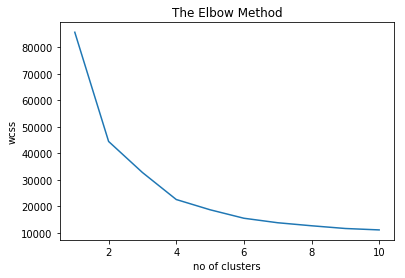

In [55]:
import matplotlib.pyplot as plt

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [132]:
kmeansmodel = KMeans(n_clusters = 4, init='k-means++', random_state=0)
y_kmeans = kmeansmodel.fit_predict(X)
pca_data = pd.DataFrame(y_kmeans)
pca_data.columns = ['labels']

In [171]:
final_df['labels'] = pca_data['labels']
#final_df
final_df[(final_df['labels'] == 3)]


,customer_unique_id,type_customer,delivered-late,carrier-late,unavailable,review_score,price,freight_value,product_description_lenght,product_photos_qty,product_weight_g,payment_installments,recency,labels
18,0012929d977a8d7280bb277c1e5f589d,1,0,0,0,1.000000,0.017470,0.036200,0.106319,0.100000,0.045764,0.038462,0.454023,3
36,002aba8c1af80acacef6e011f9f23262,1,1,1,0,1.000000,0.026945,0.025080,0.085005,0.050000,0.122449,0.115385,0.262931,3
48,00377a18050b898b93e2c774be9947db,1,1,1,0,2.000000,0.006652,0.022198,0.224423,0.050000,0.004947,0.038462,0.397989,3
70,0049db44bfd6cee26ac9c649329ff6ea,1,0,2,0,2.000000,0.010715,0.040825,0.126128,0.200000,0.042053,0.038462,0.775862,3
85,0058f300f57d7b93c477a131a59b36c3,1,0,0,0,1.000000,0.007994,0.027638,0.054413,0.050000,0.013605,0.038462,0.229885,3
116,007ba48697b079e78f168b051462dd1b,1,0,1,0,2.000000,0.017348,0.026401,0.149699,0.050000,0.162028,0.115385,0.120690,3
117,007e21b7a007c8f8dadfa43c9d5a91db,1,1,1,0,1.000000,0.007249,0.022985,0.141675,0.200000,0.019790,0.038462,0.247126,3
148,00a7d14cb10e11b7f7d65120a7e3942f,1,0,1,0,2.000000,0.006640,0.020412,0.447844,0.050000,0.004527,0.038462,0.724138,3
164,00bab5c446ba511117719c775a3f78e8,1,0,0,0,2.000000,0.003942,0.021228,0.102808,0.050000,0.013605,0.038462,0.326149,3
182,00c4d93157cffc73cb2459f52b89cee4,1,1,1,0,1.000000,0.008683,0.025333,0.232698,0.050000,0.018256,0.076923,0.451149,3
